In [1]:
from sklearn.decomposition import KernelPCA
from sklearn.cross_validation import KFold
from sklearn import svm
import numpy as np
import random
import pandas as pd
import math
from sklearn.metrics import confusion_matrix as CM
import random
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA
%matplotlib inline
from matplotlib import pyplot as plt

In [43]:
def crossValidation_forest(x,y):
    """
    version 3
    
    """
    crossErrors=[]
    #confusion_matrix=[]

    rf=RFC(n_estimators=100,max_features=None)
    kf = KFold(x.shape[0], n_folds=3,shuffle=True)
    for train,test in kf:
        rf.fit(x.ix[train],y.iloc[train])
        prediction=rf.predict(x.ix[test])
        crossErrors.append(((prediction!=y.iloc[test]).sum())/float(len(y[test])))
        #confusion_matrix.append(CM(y[test],prediction))
    return np.mean(crossErrors)#,confusion_matrix

In [3]:
def layer_rbf(x,y):
    """version 2"""
    gamma=random.uniform(0.1, 10)
    kpca=KernelPCA(kernel='rbf',gamma=gamma,n_components=x.shape[1])
    x_kpca=pd.DataFrame(kpca.fit_transform(x))
    
    xT=pd.concat((x,x_kpca),axis=1)## create 2*N features
    
    totalCrossErrors=[]
    
    for i in range(xT.shape[1],x.shape[1],-1):##stepwise back
        crossErrors=[]
        for j in range(i):
            crossError=crossValidation_forest(xT.drop(j,axis=1),y)
            crossErrors.append(crossError) 
            
        totalCrossErrors.append(crossErrors)#record the cross-validation 
        
        drop=crossErrors.index(min(crossErrors))##chose which one attribute to drop
        xT.drop(drop , axis=1 , inplace=True)
        
    
    

    return xT, totalCrossErrors
    

In [50]:
def layer_rbf_restricted(x,y):
    """version 2"""
    gamma=random.uniform(0.1, 10)
    kpca=KernelPCA(kernel='rbf',gamma=gamma,n_components=x.shape[1])
    x_kpca=pd.DataFrame(kpca.fit_transform(x))
    
    xT=pd.concat((x,x_kpca),axis=1)## create 2*N features
    
    totalCrossErrors=[]
    
    for i in range(xT.shape[1],x.shape[1]-1,-1):##stepwise back
        crossErrors=[]
        for j in range(i):
            crossError=crossValidation_forest(xT.drop(j,axis=1),y)
            crossErrors.append(crossError) 
            
        totalCrossErrors.append(crossErrors)#record the cross-validation 
        
        drop=crossErrors.index(min(crossErrors))##chose which one attribute to drop
        xT.drop(drop , axis=1 , inplace=True)
        
    
    

    return xT, totalCrossErrors

In [4]:
#     gamma=random.uniform(0.1, 10)
#     kpca=KernelPCA(kernel='rbf',gamma=gamma,n_components=x.shape[1])
#     x_kpca=pd.DataFrame(kpca.fit_transform(x))
    
#     xT=pd.concat((x,x_kpca),axis=1)## create 2*N features
    
#     totalCrossErrors=[]
#     print xT.shape

In [5]:
#     print xT.shape
#     for i in range(xT.shape[1],x.shape[1],-1):##stepwise back
#         #print "i",i
#         crossErrors=[]
#         for j in range(i):##for
#             #print "j:",j
            
#         #crossError,c=crossValidation_forest(xT,y)
#             crossError=crossValidation_forest(xT.drop(j,axis=1),y)
#             crossErrors.append(crossError)
#             print "i,j",i,j,crossErrors
#         totalCrossErrors.append(crossErrors)
#         drop=crossErrors.index(min(crossErrors))##chose which one to drop
#         print "length------------------",len(crossErrors)
#         print "!!!!drop",drop
#         print "before drop",xT.shape
#         xT.drop(drop , axis=1 , inplace=True)
#         print "after drop",xT.shape

In [6]:
# from sklearn.datasets import load_iris
# iris=load_iris()
# x=iris.data
# y=iris.target

In [7]:
# x=pd.DataFrame(x)
# #select=[1,2,3,4,100]

In [8]:
# print x.shape
# x.drop(3,axis=1,inplace=True)
# print x.shape

In [9]:
def plotErr(err):
    x=range(len(err))
    #y=[e/min(err) for e in err]
    plt.bar(x,err)
    plt.title('Error Bar_Chart')
    plt.show()

In [10]:
def plotdata(x,y):
    n=x.shape[1]
    fig,ax=plt.subplots(ncols=n,nrows=n)
    fig.set_size_inches(9,6)
    for i in xrange(n):
        for j in xrange(i+1):
            for t,color in zip(xrange(3),'rgb'):
                ax[i][j].scatter(x.ix[y == t,i],x.ix[y == t,j],c=color)
    plt.show()

In [11]:
path=r"C:\Users\zc\Documents\MNIST data\train.csv"
mnist=pd.read_csv(path,sep=",")
#print mnist.columns
y=mnist['label']
print mnist.shape
x=mnist.drop('label',axis=1)

(42000, 785)


In [12]:
sample=random.sample(range(x.shape[0]),200)
#print sample
x=x.loc[sample]
y=y[sample]

In [13]:
#print y

In [14]:
#print type(x)

In [15]:
pca = PCA(n_components=x.shape[1])
pca.fit(x)
print(sum(pca.explained_variance_ratio_))

1.0


In [16]:
explainedRatio=[]
explained=0
for i in pca.explained_variance_ratio_:
    explained+=i
    explainedRatio.append(explained)

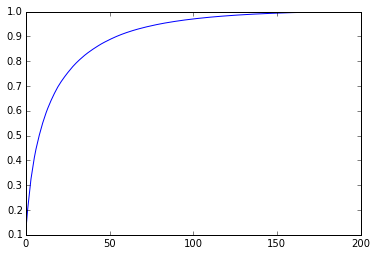

In [17]:
index=range(len(explainedRatio))
from matplotlib import pyplot as plt
plt.plot(index,explainedRatio)
plt.show()

In [54]:
for i in range(len(explainedRatio)):
    if explainedRatio[i]>0.95:
        break
print i

80


In [24]:
pca = PCA(n_components=i)
x_c=pca.fit_transform(x)
x_c=pd.DataFrame(x_c)

In [25]:
print x_c.shape
print y.shape

(200, 8)
(200L,)


In [42]:
crossErrors=[]
rf=RFC(n_estimators=100,max_features=None)
kf = KFold(x.shape[0], n_folds=3,shuffle=True)
for train,test in kf:
    rf.fit(x_c.ix[train],y.iloc[train])
    prediction=rf.predict(x_c.ix[test])
    crossErrors.append(((prediction!=y.iloc[test]).sum())/float(len(y[test])))
    #confusion_matrix.append(CM(y[test],prediction))
print np.mean(crossErrors)#,confusion_matrix


0.380295492236


In [41]:
# for train,test in kf:
#     print y.iloc[train]

1926     8
15475    8
22445    9
18669    3
7475     2
6993     7
19769    7
24533    0
29521    1
21130    9
23281    9
8881     6
32757    2
27858    5
28643    4
1474     0
35312    0
8158     6
33314    1
19259    2
23085    3
31596    0
10407    3
14854    8
39850    0
29333    3
2113     9
25577    4
13803    7
23681    1
        ..
20918    0
2216     4
14041    4
23829    8
2127     5
755      1
4940     5
3765     6
37496    5
21163    4
21537    9
17983    1
22812    6
2331     8
38427    4
9375     6
20981    1
31735    5
38675    9
28456    9
10680    4
11206    6
12490    7
5847     2
12729    0
5401     4
15010    8
41877    8
35530    1
39636    0
Name: label, dtype: int64
8926     1
15475    8
36291    9
33272    5
22445    9
11412    5
18669    3
7475     2
19769    7
34663    0
29521    1
27858    5
16778    3
13872    1
39862    2
35312    0
33314    1
26135    0
35123    6
23085    3
2491     1
31596    0
10703    9
41246    9
10407    3
14854    8
12340    0
29333 

In [44]:
resultlist,errorlist=[],[]

In [48]:
for i in range(4):
    result,error=layer_rbf(x_c,y)
    resultlist.append(result)
    errorlist.append(error)

layer: 0


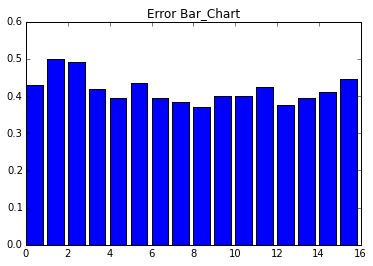

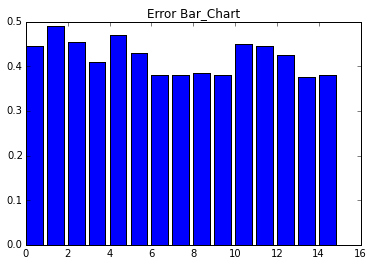

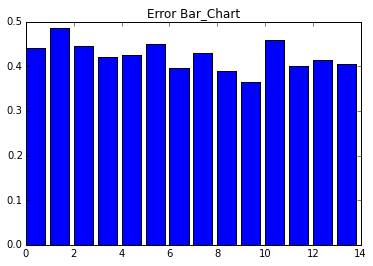

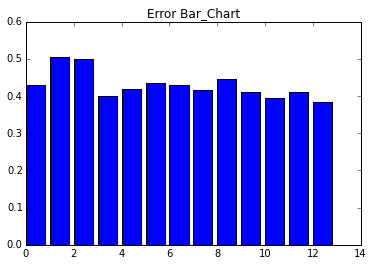

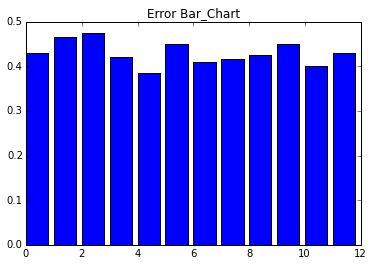

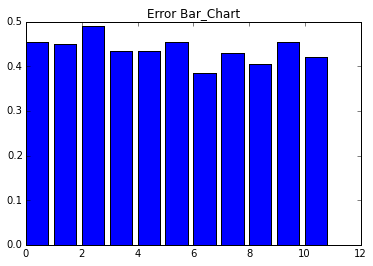

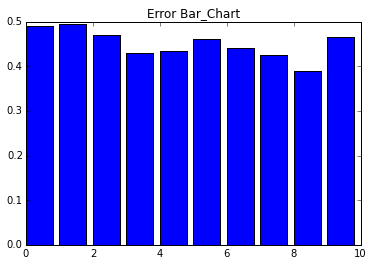

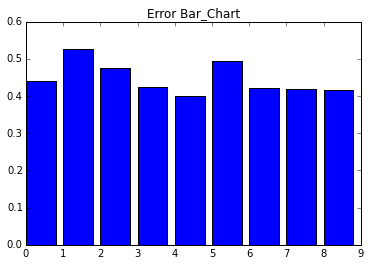

layer: 1


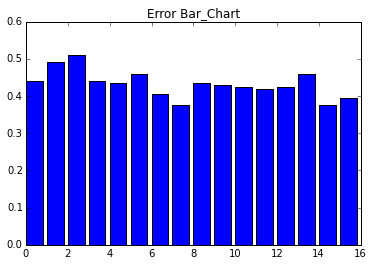

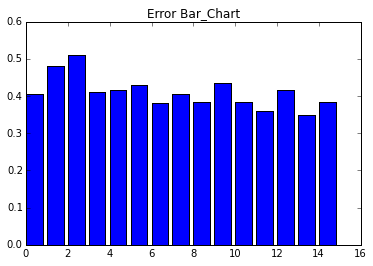

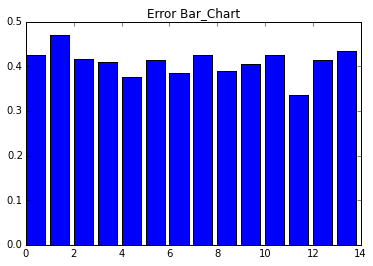

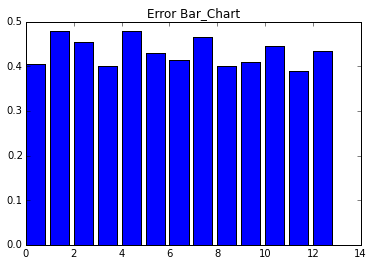

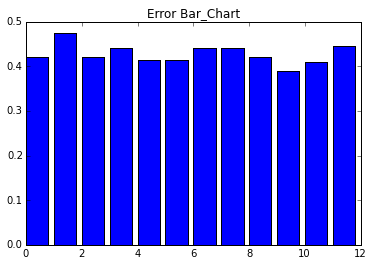

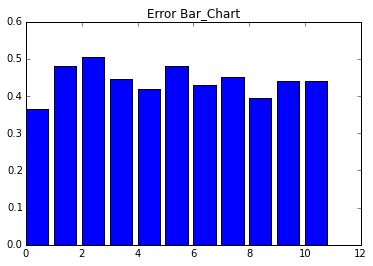

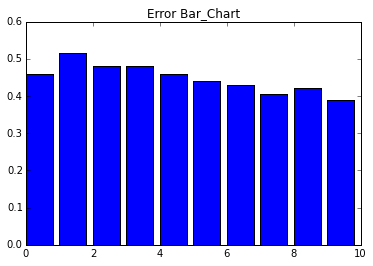

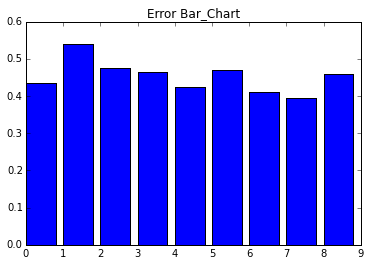

layer: 2


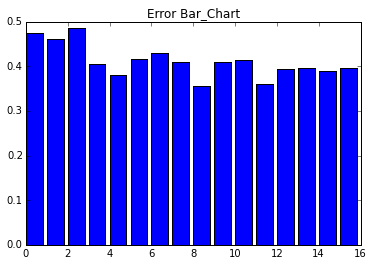

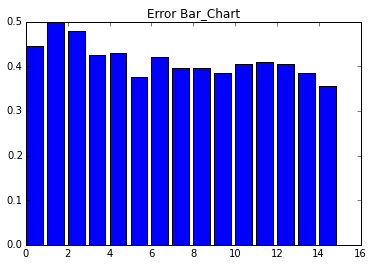

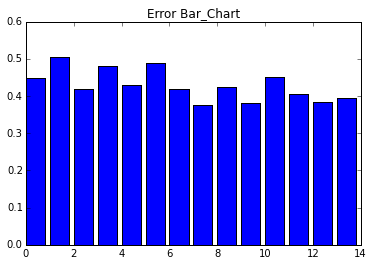

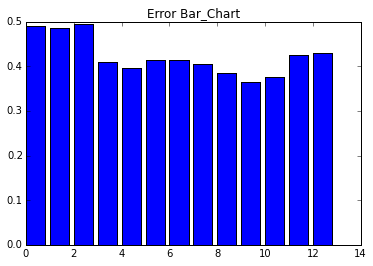

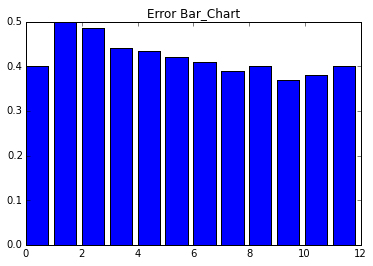

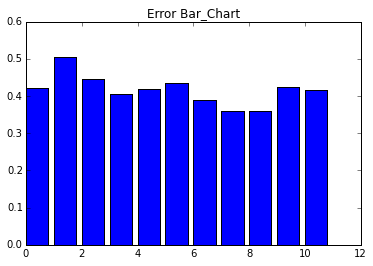

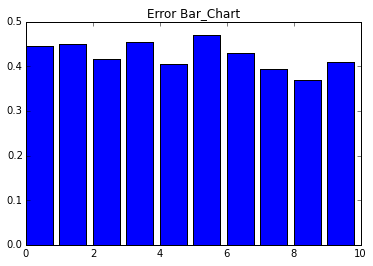

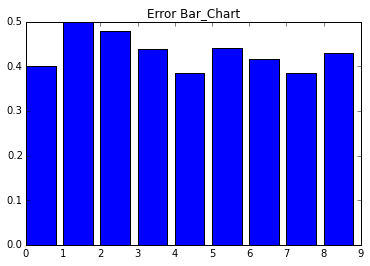

layer: 3


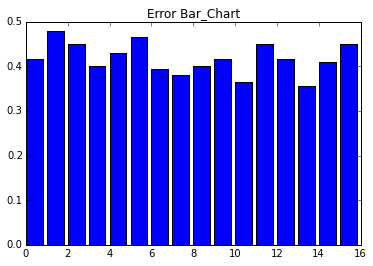

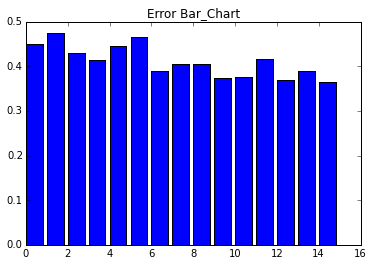

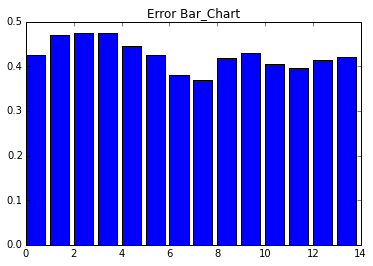

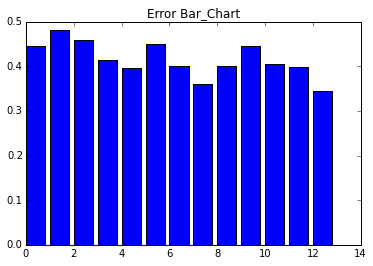

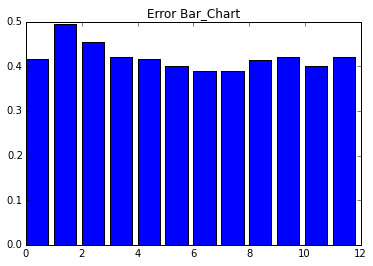

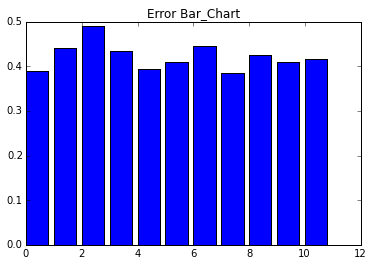

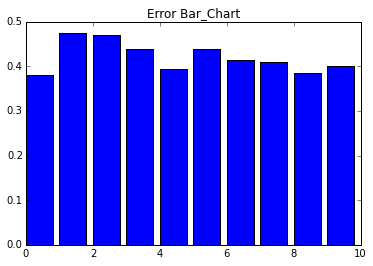

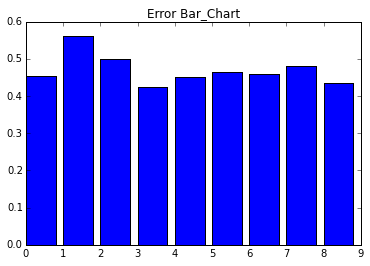

layer: 4


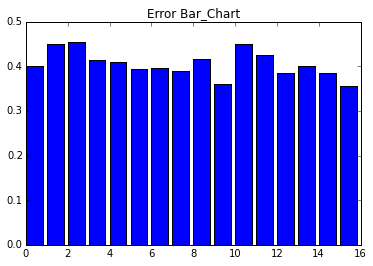

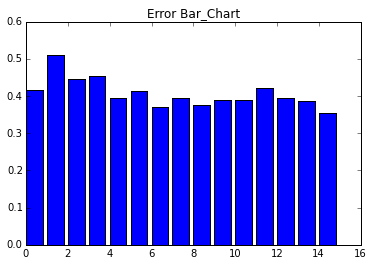

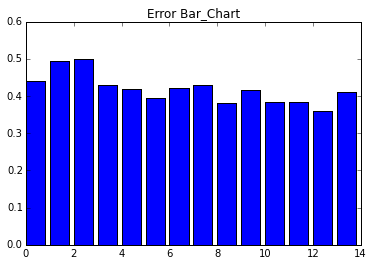

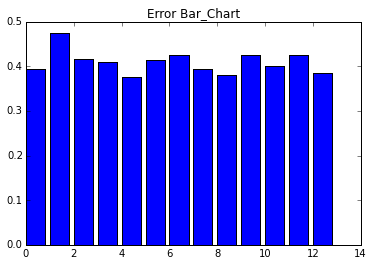

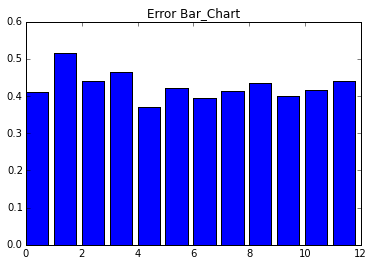

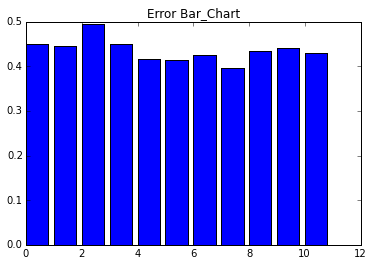

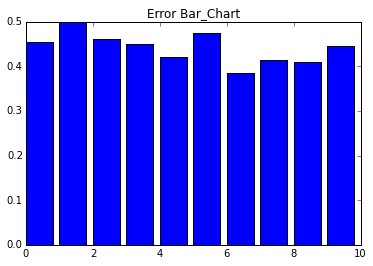

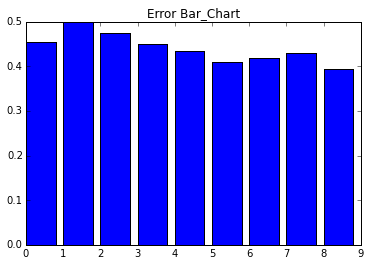

In [49]:
for i in range(len(errorlist)):
    print "layer:",i
    for j in range(len(errorlist[i])):
        plotErr(errorlist[i][j])
#         print errorlist[i][j]

In [51]:
resultlist,errorlist=[],[]

In [52]:
for i in range(4):
    result,error=layer_rbf_restricted(x_c,y)
    resultlist.append(result)
    errorlist.append(error)

layer: 0


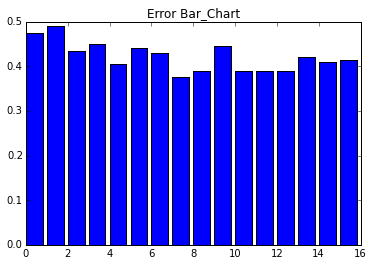

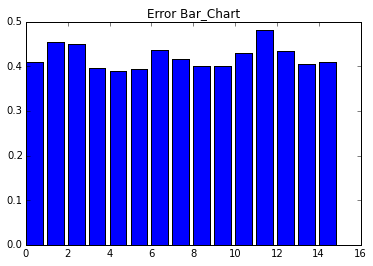

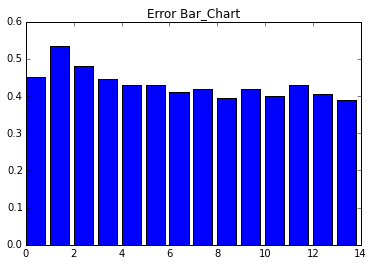

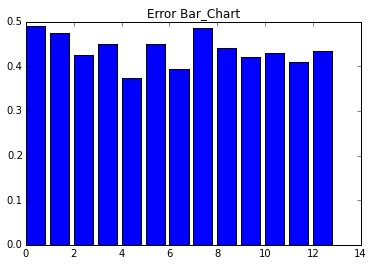

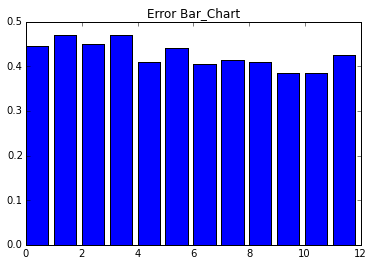

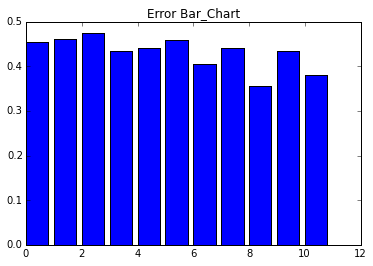

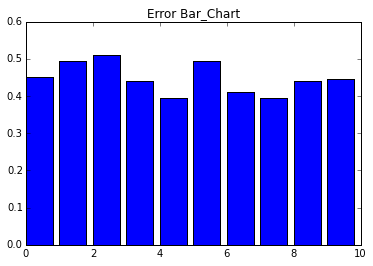

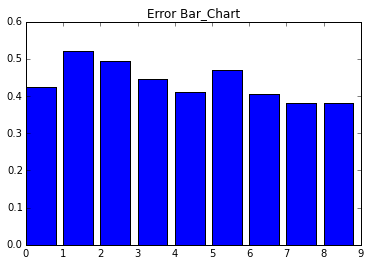

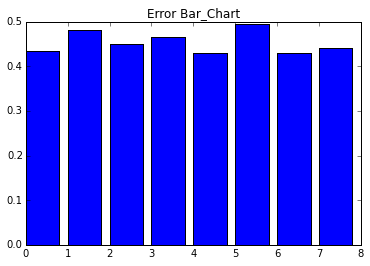

layer: 1


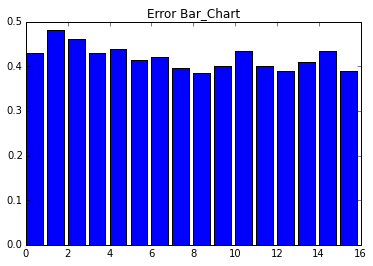

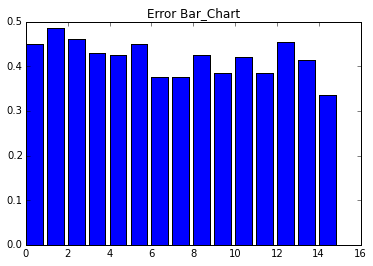

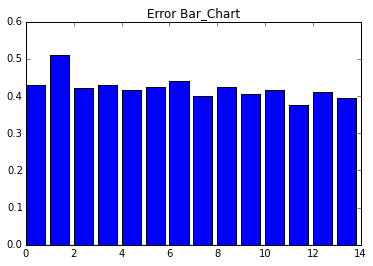

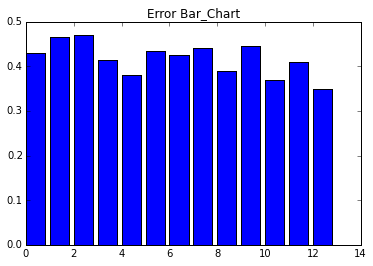

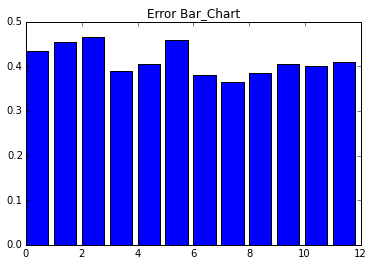

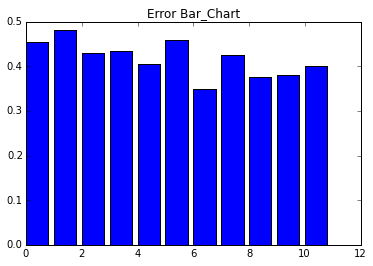

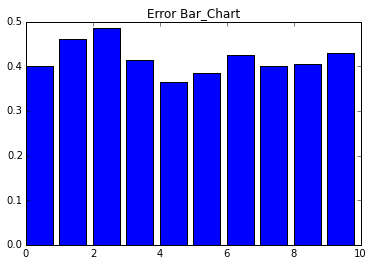

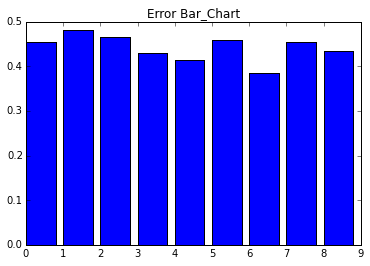

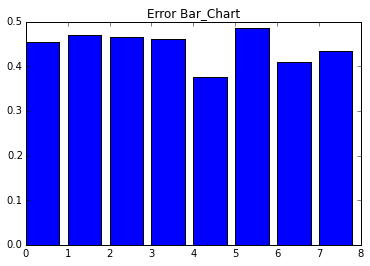

layer: 2


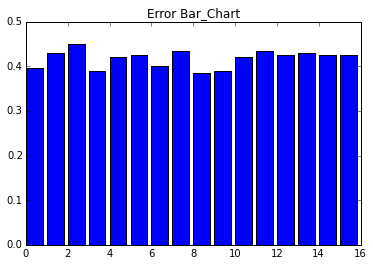

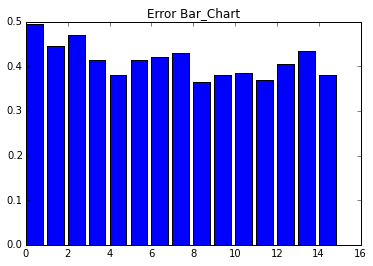

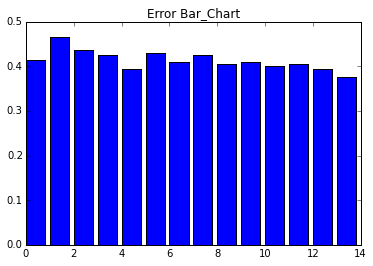

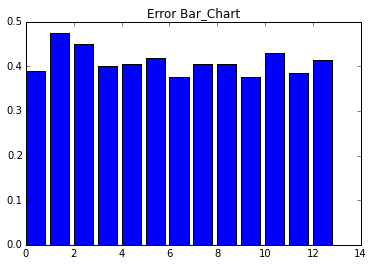

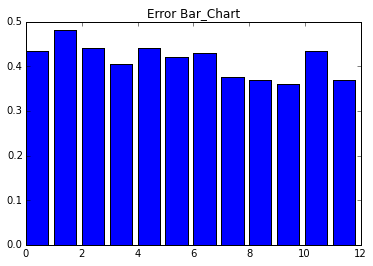

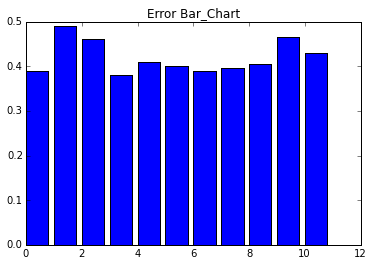

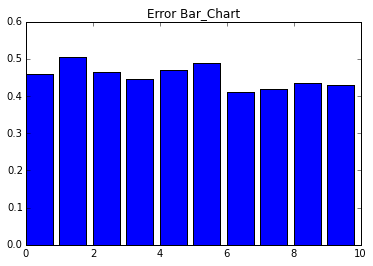

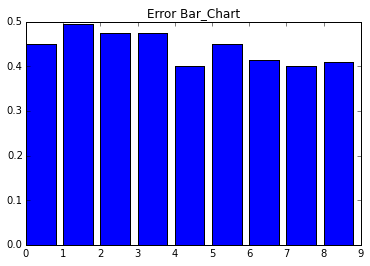

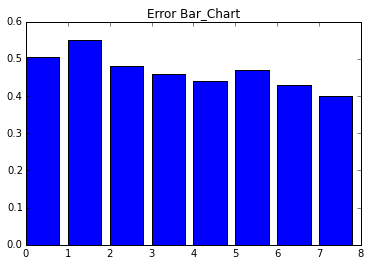

layer: 3


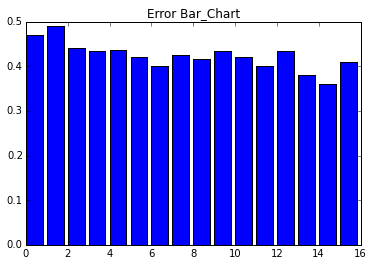

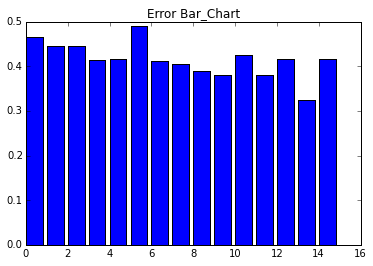

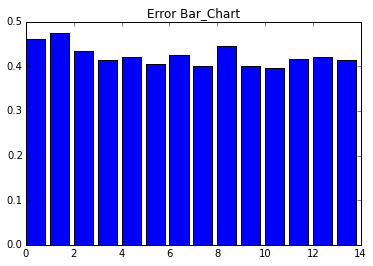

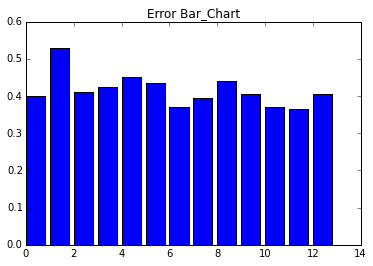

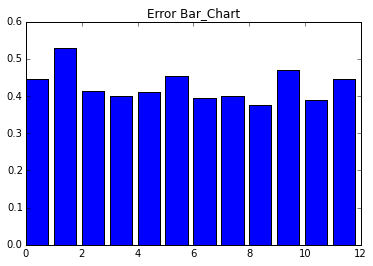

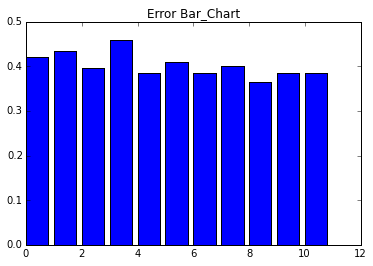

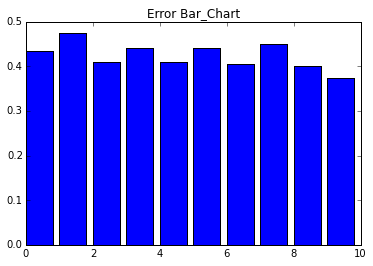

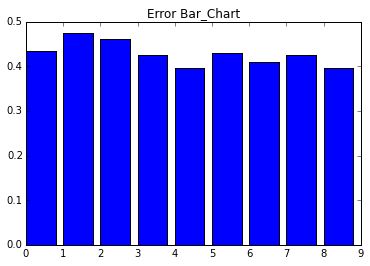

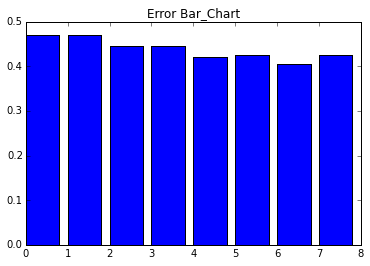

In [55]:
for i in range(len(errorlist)):
    print "layer:",i
    for j in range(len(errorlist[i])):
        plotErr(errorlist[i][j])